# Atividade Prática II - Treinamento e Validação de Modelos de RL

**Aluno:** Felipe Eduardo Gomes

**Disciplina:** Reinforcement Learning - Turma II

**Data:** 21/08/2021



Neste trabalho vamos aplicar `Gym`, `Stable-Baselines3` e `RL Baselines Zoo` para lidar com o treinamento e validação de problemas de aprendizado por reforço. Sua tarefa é:

1. Selecionar um cenário da biblioteca `Gym` de sua preferência, desde que este cenário também seja contemplado pelos modelos disponibilizados na `rl baselines zoo`;<br>
R: Para o trabalho, escolhi utilizar o LunarLander-v2.<br><br>

2. Selecionar três algoritmos das biblioteca `Stable-baselines3` para resolver esse problema. Pesquise na documentação da biblioteca quais são os algoritmos mais adequados para o ambiente escolhido e justifique a sua escolha.<br>
R: Foram escolhidos os seguintes algoritmos: POO, A2C e DQN.<br><br>

3. Realize o treinamento de cada um dos três modelos ---você pode ajustar os parâmetros do modelos, se achar necessário--- e salve os modelos em disco.<br>
R: Os três modelos treinados estão na pasta "models".<br><br>

4. De posse dos modelos treinados e salvos, carregue-os e avalie-os por 10 episódios. Apresente os resultados médios e gere a curva de recompensa acumulada disponibilizada pelo `TensorBoard`.<br>
R: Os resultados e os gráficos foram gerados na pasta "tensorboard".<br><br>

5. Compare os resultados dos modelos treinados com os resultados obtidos por modelo(s) existentes no `RL Baselines Zoo` para o cenário escolhido.<br>
R: Os resultados do treinamento foram gerados na pasta "tensorboard".<br><br>

6. Gere um vídeo do melhor modelo que você treinou e do modelo escolhido na `RL Baselines Zoo`. Verifique a documentação de cada biblioteca sobre a criação do vídeo e visualização em Notebooks.<br>
R: Os vídeos foram gerados estão disponíveis na pasta "videos".<br><br>


* **Data de entrega:** 04/09/2021
* **Local de envio:** AVA.
* **Tipo de documento:** Notebook (`.ipynb`).



**Gráficos do Tensorboard com os resultados do treinamento e do RL Baselines Zoo**
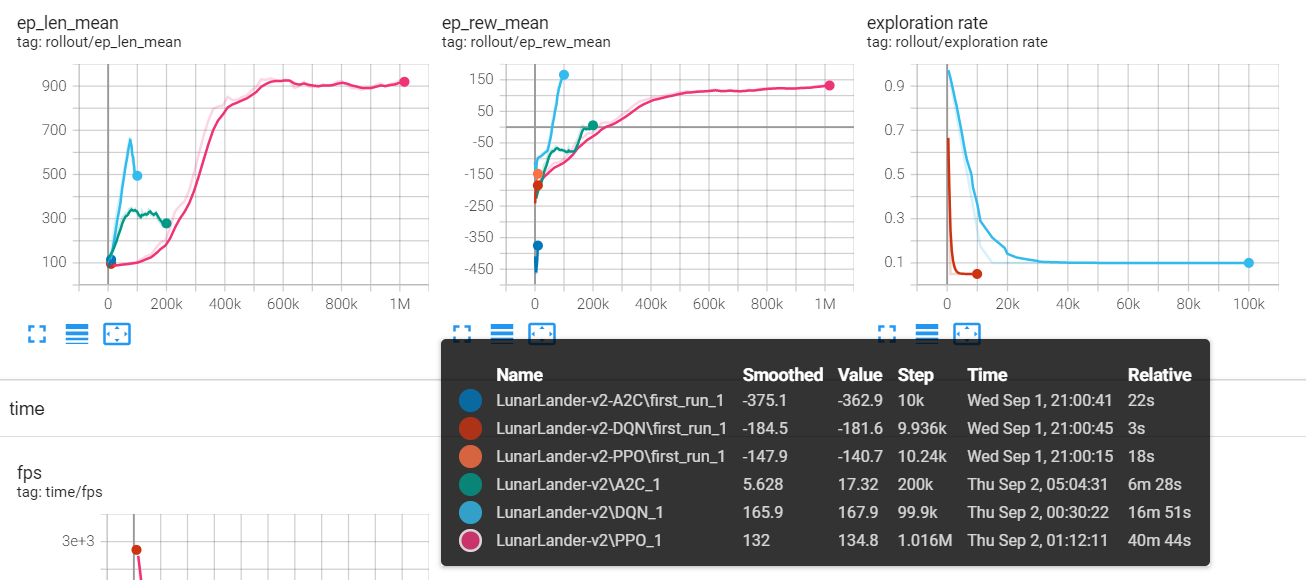

**GIF do modelo A2C treinado**
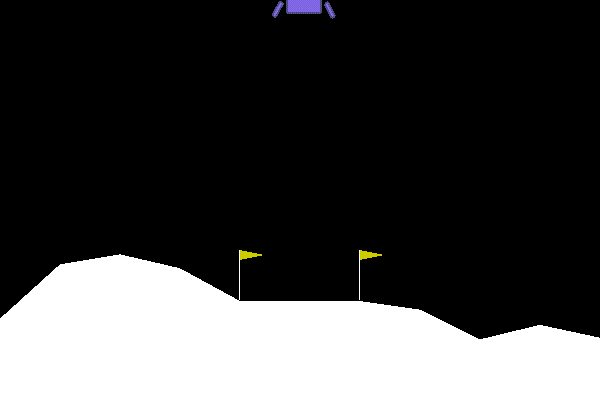

**GIF do modelo DQN treinado**
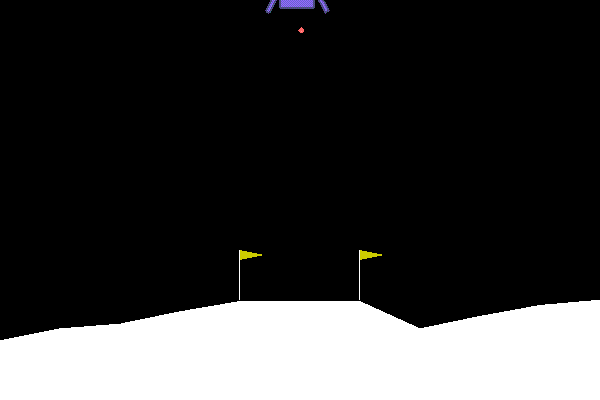

**GIF do modelo PPO treinado**
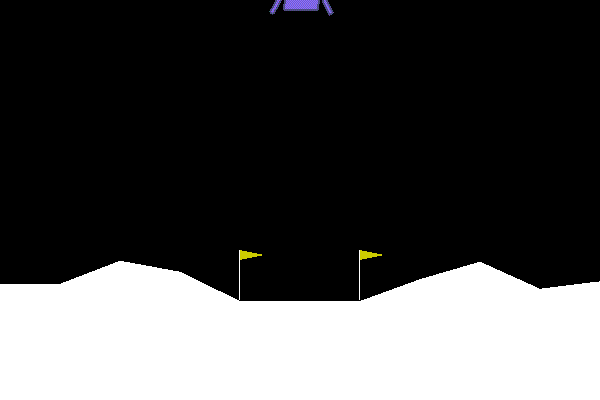

In [1]:
import gym

from stable_baselines3 import DQN
from stable_baselines3 import PPO
from stable_baselines3 import A2C
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import CheckpointCallback, EvalCallback

import time

# Create environment
scenario = 'LunarLander-v2'
env = gym.make(scenario)

In [2]:
from PIL import Image, ImageDraw, ImageFont

def save_frames_as_gif(frames, path='./', filename='gym_animation', label='sample'):
    images = []

    font = ImageFont.truetype('arial')

    for index, frame in enumerate(frames):
        image = Image.fromarray(frame)
        title = f'{label}-{index}'
        draw = ImageDraw.Draw(image)
        width, height = image.size
        text_w, text_h = draw.textsize(title, font)
        draw.text((1, height-text_h-1),title,(255,255,255),font=font)
        images.append(image)

    # loop=0: loop forever, duration=1: play each frame for 1ms
    images[0].save(
        f'{path}{filename}-{label}.gif', save_all=True, append_images=images[1:], loop=0, duration=1)

In [25]:
%%time
# Treina e salva os modelos
from stable_baselines3 import PPO, A2C, DQN

PPO('MlpPolicy', env, tensorboard_log=f"./tensorboard/{scenario}-PPO/") \
    .learn(10000, tb_log_name="first_run").save(f'models/{scenario}-PPO')

A2C('MlpPolicy', env, tensorboard_log=f"./tensorboard/{scenario}-A2C/") \
    .learn(10000, tb_log_name="first_run").save(f'models/{scenario}-A2C')

DQN('MlpPolicy', env, tensorboard_log=f"./tensorboard/{scenario}-DQN/") \
    .learn(10000, tb_log_name="first_run").save(f'models/{scenario}-DQN')

Wall time: 49.6 s


In [36]:
def evaluate(algoritmo, episodes=500):
  env = gym.make(scenario)

  nome_algoritmo = algoritmo.__name__
  trained_model = algoritmo.load(f"models/{scenario}-{nome_algoritmo}", env=env)

  # Evaluate the agent
  mean_reward, std_reward = evaluate_policy(trained_model, trained_model.get_env(), n_eval_episodes=10)
  print(f"{scenario}-{nome_algoritmo} mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")  
  evaluate
    
  frames = []
  obs = env.reset()
  for i in range(episodes):
      action, _states = trained_model.predict(obs, deterministic=True)
      obs, reward, done, info = env.step(action)
      
      env.render()
      time.sleep(0.0003)
        
      rgb_observation = env.render(mode = 'rgb_array') 
      frames.append(rgb_observation)

      if done:
        obs = env.reset()

  env.close()

  save_frames_as_gif(frames, 'images/', scenario, nome_algoritmo)

evaluate(PPO)
evaluate(A2C)
evaluate(DQN)

LunarLander-v2-PPO mean_reward:-1094.20 +/- 704.86
LunarLander-v2-A2C mean_reward:-236.06 +/- 410.82
LunarLander-v2-DQN mean_reward:-581.49 +/- 255.06


In [51]:
#RL Baselines3 Zoo - avaliação via TensorBoard DQN
!python train.py --algo dqn --env LunarLander-v2 --verbose 0 --tensorboard-log ../tensorboard/

========== LunarLander-v2 ==========
Seed: 166245351
Log path: logs/dqn/LunarLander-v2_4
Eval num_timesteps=10000, episode_reward=-7.68 +/- 15.60
Episode length: 1000.00 +/- 0.00
New best mean reward!
Eval num_timesteps=20000, episode_reward=-10.74 +/- 20.54
Episode length: 1000.00 +/- 0.00
Eval num_timesteps=30000, episode_reward=-41.83 +/- 26.94
Episode length: 1000.00 +/- 0.00
Eval num_timesteps=40000, episode_reward=-62.44 +/- 115.16
Episode length: 892.60 +/- 214.80
Eval num_timesteps=50000, episode_reward=139.27 +/- 180.65
Episode length: 464.60 +/- 174.91
New best mean reward!
Eval num_timesteps=60000, episode_reward=210.21 +/- 91.90
Episode length: 420.00 +/- 290.66
New best mean reward!
Eval num_timesteps=70000, episode_reward=95.34 +/- 129.56
Episode length: 231.40 +/- 68.05
Eval num_timesteps=80000, episode_reward=213.07 +/- 88.02
Episode length: 217.00 +/- 53.89
New best mean reward!
Eval num_timesteps=90000, episode_reward=184.73 +/- 98.15
Episode length: 342.80 +/- 330.89

In [52]:
#RL Baselines3 Zoo - avaliação via TensorBoard PPO
!python train.py --algo ppo --env LunarLander-v2 --verbose 0 --tensorboard-log ../tensorboard/

========== LunarLander-v2 ==========
Seed: 3705452681
Log path: logs/ppo/LunarLander-v2_2
Eval num_timesteps=10000, episode_reward=-139.27 +/- 37.22
Episode length: 69.60 +/- 13.12
New best mean reward!
Eval num_timesteps=20000, episode_reward=-294.62 +/- 120.24
Episode length: 63.80 +/- 7.25
Eval num_timesteps=30000, episode_reward=-113.14 +/- 82.28
Episode length: 61.80 +/- 10.46
New best mean reward!
Eval num_timesteps=40000, episode_reward=-43.31 +/- 31.63
Episode length: 92.00 +/- 11.88
New best mean reward!
Eval num_timesteps=50000, episode_reward=37.37 +/- 68.02
Episode length: 305.60 +/- 270.55
New best mean reward!
Eval num_timesteps=60000, episode_reward=2.48 +/- 72.58
Episode length: 400.80 +/- 184.62
Eval num_timesteps=70000, episode_reward=-325.89 +/- 27.03
Episode length: 198.60 +/- 36.65
Eval num_timesteps=80000, episode_reward=-289.86 +/- 57.90
Episode length: 220.20 +/- 51.93
Eval num_timesteps=90000, episode_reward=-325.96 +/- 9.21
Episode length: 586.80 +/- 91.00
Eva

Episode length: 475.40 +/- 20.74
Eval num_timesteps=920000, episode_reward=216.79 +/- 23.17
Episode length: 457.40 +/- 8.06
Eval num_timesteps=930000, episode_reward=234.89 +/- 35.63
Episode length: 560.80 +/- 222.11
Eval num_timesteps=940000, episode_reward=228.57 +/- 18.96
Episode length: 452.80 +/- 16.38
Eval num_timesteps=950000, episode_reward=236.38 +/- 19.94
Episode length: 458.80 +/- 21.00
Eval num_timesteps=960000, episode_reward=241.44 +/- 14.38
Episode length: 454.40 +/- 33.39
Eval num_timesteps=970000, episode_reward=244.26 +/- 22.74
Episode length: 443.40 +/- 33.98
Eval num_timesteps=980000, episode_reward=233.03 +/- 23.77
Episode length: 444.80 +/- 17.23
Eval num_timesteps=990000, episode_reward=240.08 +/- 8.53
Episode length: 430.40 +/- 22.46
Eval num_timesteps=1000000, episode_reward=243.19 +/- 23.22
Episode length: 392.20 +/- 11.62
Eval num_timesteps=1010000, episode_reward=228.29 +/- 9.60
Episode length: 398.40 +/- 7.71
Saving to logs/ppo/LunarLander-v2_2


In [53]:
#RL Baselines3 Zoo - avaliação via TensorBoard A2C
!python train.py --algo a2c --env LunarLander-v2 --verbose 0 --tensorboard-log ../tensorboard/

========== LunarLander-v2 ==========
Seed: 962424400
Log path: logs/a2c/LunarLander-v2_2
Eval num_timesteps=10000, episode_reward=-3962.24 +/- 2406.79
Episode length: 685.60 +/- 304.44
New best mean reward!
Eval num_timesteps=20000, episode_reward=-3287.48 +/- 372.84
Episode length: 688.80 +/- 28.65
New best mean reward!
Eval num_timesteps=30000, episode_reward=-6330.57 +/- 1734.95
Episode length: 869.00 +/- 54.48
Eval num_timesteps=40000, episode_reward=-2696.91 +/- 2338.05
Episode length: 879.00 +/- 228.74
New best mean reward!
Eval num_timesteps=50000, episode_reward=-294.40 +/- 183.26
Episode length: 860.40 +/- 279.20
New best mean reward!
Eval num_timesteps=60000, episode_reward=-266.06 +/- 180.98
Episode length: 880.80 +/- 238.40
New best mean reward!
Eval num_timesteps=70000, episode_reward=-445.56 +/- 325.98
Episode length: 853.20 +/- 218.38
Eval num_timesteps=80000, episode_reward=-128.41 +/- 238.89
Episode length: 740.80 +/- 320.10
New best mean reward!
Eval num_timesteps=900

In [ ]:
# analisar os dados de treinamento e do RL Baselines3 Zoo no TensorBoard
#!tensorboard --logdir ./lunar_tensorboard/

In [5]:
%cd ../

C:\Users\feeli


In [6]:
%cd rl-baselines3-zoo/
!python -m utils.record_training --algo ppo --env LunarLander-v2 -n 1000 -f logs --deterministic --gif

C:\Users\feeli\rl-baselines3-zoo
Saving video to C:\Users\feeli\rl-baselines3-zoo\logs\ppo\LunarLander-v2_2\videos\final-model-ppo-LunarLander-v2-step-0-to-step-1000.mp4

C:\Users\feeli\AppData\Local\Programs\Python\Python39\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Não é possível alterar o modo de thread depois de o mesmo estar definido
  warnings.warn(str(err))
Exception ignored in: <function VecVideoRecorder.__del__ at 0x0000023E30048DC0>
Traceback (most recent call last):
  File "C:\Users\feeli\AppData\Local\Programs\Python\Python39\lib\site-packages\stable_baselines3\common\vec_env\vec_video_recorder.py", line 113, in __del__
  File "C:\Users\feeli\AppData\Local\Programs\Python\Python39\lib\site-packages\stable_baselines3\common\vec_env\vec_video_recorder.py", line 109, in close
AttributeError: 'NoneType' object has no attribute 'close'
C:\Users\feeli\AppData\Local\Programs\Python\Python39\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Não é possível alterar o modo de thread depois de o mesmo estar definido
  warnings.warn(str(err))
Exception ignored in: <function Ve


Saving video to C:\Users\feeli\rl-baselines3-zoo\logs\ppo\LunarLander-v2_2\videos\best-model-ppo-LunarLander-v2-step-0-to-step-1000.mp4
Loading latest experiment, id=2
Saving video to C:\Users\feeli\rl-baselines3-zoo\logs\ppo\LunarLander-v2_2\videos\training.mp4
Saving gif to C:\Users\feeli\rl-baselines3-zoo\logs\ppo\LunarLander-v2_2\videos\training.gif
